<a href="https://colab.research.google.com/github/NishatVasker/training_any_images/blob/main/Heart_Health_Insight_A_Deep_Dive_into_Heart_Disease_Classification_with_XAI_and_Kernel_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.9 MB/s eta 0:00:00


In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from alibi.explainers import KernelShap
from scipy.special import logit
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [16]:
import os

# Rename the uploaded API key file to "kaggle.json"
os.rename("kaggle.txt", "kaggle.json")


In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [20]:
!pip install --upgrade kaggle


In [26]:
!pip install kaggle
from google.colab import files
import os

# Upload your Kaggle API key
files.upload()

# Rename the uploaded API key file to "kaggle.json"
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# Set appropriate permissions for the API key
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d heart-cleveland-uci/heart-cleveland-upload

# Unzip the downloaded dataset
!unzip heart-cleveland-upload.zip


Saving kaggle.json to kaggle (1).json
403 - Forbidden - Permission 'datasets.get' was denied
unzip:  cannot find or open heart-cleveland-upload.zip, heart-cleveland-upload.zip.zip or heart-cleveland-upload.zip.ZIP.


In [28]:
data = pd.read_csv('/content/heart_cleveland_upload.csv')
# To display the top 5 rows
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sex', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='chol', y='fbs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['sex']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['trestbps']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('trestbps')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cp']
  ys = series['chol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('cp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cp')
_ = plt.ylabel('chol')

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
heart = data.copy()

In [30]:
target = 'condition'
features_list = list(heart.columns)
features_list.remove(target)

In [31]:
y = heart.pop('condition')

In [33]:
from sklearn.model_selection import train_test_split

# Other common imports
import numpy as np
import pandas as pd
# Import any other libraries you need


In [34]:
X_train, X_test, y_train, y_test = train_test_split(heart, y, test_size=0.2, random_state=33)

In [35]:
print("Training records: {}".format(X_train.shape[0]))
print("Testing records: {}".format(X_test.shape[0]))

Training records: 237
Testing records: 60


In [37]:
from sklearn.preprocessing import StandardScaler

# Other common imports
import numpy as np
import pandas as pd
# Import any other libraries you need


In [38]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
classifier = LogisticRegression()

# Fit the classifier to the training data
classifier.fit(X_train_norm, y_train)


LogisticRegression()

In [42]:
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_norm, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_norm)


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


In [44]:
pred = classifier.predict_proba
lr_explainer = KernelShap(pred, link='logit')
#The purpose of the logit link is to take a linear combination of the values (which may take any value between ±∞) and convert those values to the scale of a probability, i.e., between 0 and 1.
lr_explainer.fit(X_train_norm)

KernelShap(meta={
  'name': 'KernelShap',
  'type': ['blackbox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'link': 'logit',
              'group_names': None,
              'grouped': False,
              'groups': None,
              'weights': None,
              'summarise_background': False,
              'summarise_result': None,
              'transpose': False,
              'kwargs': {}}
            ,
  'version': '0.9.4'}
)

In [45]:
lr_explanation = lr_explainer.explain(X_test_norm, l1_reg=False)

  0%|          | 0/60 [00:00<?, ?it/s]

In [46]:
idx =  4
instance = X_test_norm[idx][None, :]
pred = classifier.predict(instance)
class_idx = pred.item()
print("The predicted class for the X_test_norm[{}] is {}.".format(idx, *pred))

The predicted class for the X_test_norm[4] is 1.


In [47]:
shap.initjs()
shap.force_plot(lr_explanation.expected_value[class_idx], lr_explanation.shap_values[class_idx][idx,:], X_test_norm[idx][None, :],features_list)

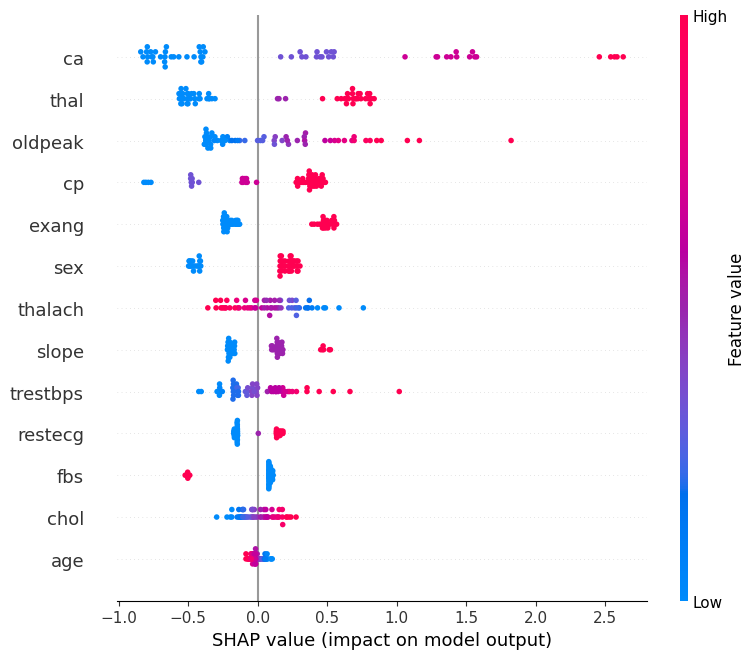

In [48]:
shap.summary_plot(lr_explanation.shap_values[1], X_test_norm, features_list)